In [1]:
# First, let's upgrade scikit-learn package in colab
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 58.6 MB/s eta 0:00:00
1.2.1


In [2]:
import pandas as pd
import io
import os
import numpy as np
import copy
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Loading the Dataset

In [3]:
df = pd.read_csv('/content/housepricedata.csv')
print(df.shape)

(1460, 11)


In [4]:
df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


# Getting Some Insights from Our Data

In [17]:
def area(area_value):
  cat = ''
  if area_value >= 10000:
    cat = 'big'
  if 5000 <= area_value < 10000:
    cat = 'medium'
  if area_value < 5000:
    cat = 'small'
  return cat

In [18]:
df['category by size'] = df['LotArea'].apply(area)

In [19]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice,category by size
0,8450,7,5,856,2,1,3,8,0,548,1,medium
1,9600,6,8,1262,2,0,3,6,1,460,1,medium
2,11250,7,5,920,2,1,3,6,1,608,1,big
3,9550,7,5,756,1,0,3,7,1,642,0,medium
4,14260,8,5,1145,2,1,4,9,1,836,1,big
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1,medium
1456,13175,6,6,1542,2,0,3,7,2,500,1,big
1457,9042,7,9,1152,2,0,4,9,2,252,1,medium
1458,9717,5,6,1078,1,0,2,5,0,240,0,medium


In [13]:
df.isna().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
category by size    0
dtype: int64

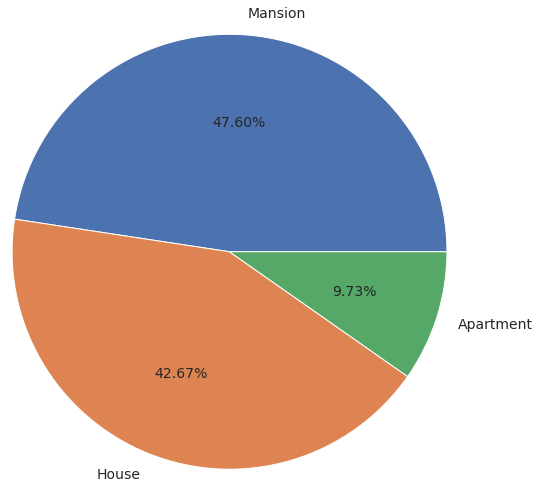

In [20]:
# Now, let's query the corresponding slice from our main dataframe
selected_labels = ['Mansion','House', 'Apartment']
df['category by size'].value_counts().plot(
    kind = 'pie',figsize=(16,8),autopct='%1.2f%%',ylabel='',
    radius=1.25,labels=selected_labels,fontsize=14)

# Now let's setup the labels, titles and format y axis as percentages
#plt.legend(selected_labels,loc='lower right',fontsize=14)
plt.show()


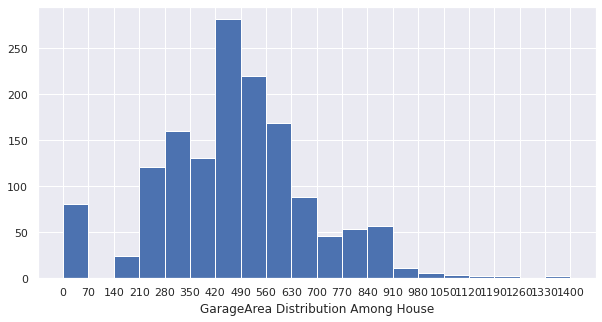

In [22]:
# Setup bins
no_bins = 20
min_bin_value = int(df['GarageArea'].min())
max_bin_value = int(df['GarageArea'].max())+1
no_data_points = df.shape[0]
predefined_bins = list(range(min_bin_value,max_bin_value,int((max_bin_value-min_bin_value)/no_bins)))

# Create the histogram
df['GarageArea'].hist(bins=predefined_bins,figsize=(10,5))

# Now let's setup the labels, titles and format y axis as percentages
plt.xlabel('GarageArea Distribution Among House')
plt.xticks(predefined_bins)
plt.show()

# Data Cleaning
From the above overview, we saw some rows with null values. To save time, we simply drop them here.

In [24]:
null_columns = []
for col_name in list(df.columns):
  no_null_values = sum(df[col_name].isnull())
  if no_null_values:
    print('Number of null values in column %s is %d' %(col_name,no_null_values))
    null_columns.append(col_name)

In [25]:
df.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(1460, 12)

# Feature Engineering
It would be nice to do some feature engineering before moving to the regression phase. 

In the interest of time, we forego this step.

# Data Preprocessing
Next step in preparing our data would be to make all columns have numerical values.
Looking at the data, we see that all columns are numerical. Good news for us!


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LotArea           1460 non-null   int64 
 1   OverallQual       1460 non-null   int64 
 2   OverallCond       1460 non-null   int64 
 3   TotalBsmtSF       1460 non-null   int64 
 4   FullBath          1460 non-null   int64 
 5   HalfBath          1460 non-null   int64 
 6   BedroomAbvGr      1460 non-null   int64 
 7   TotRmsAbvGrd      1460 non-null   int64 
 8   Fireplaces        1460 non-null   int64 
 9   GarageArea        1460 non-null   int64 
 10  AboveMedianPrice  1460 non-null   int64 
 11  category by size  1460 non-null   object
dtypes: int64(11), object(1)
memory usage: 148.3+ KB


### Normalization/Stadardization
Our next step would be to "normalize" all the columns so thatthey have a "similar" range. To this end, we will use scikit-learn's SatndardScaler, to make the selected columns have the normal distribution.

In [30]:
target_variable = df.pop('AboveMedianPrice')

In [32]:
df = df.iloc[:, :-1]

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler() #MinMaxScaler()

standard_scaling_columns = list(df.columns)
df[standard_scaling_columns] = scaler.fit_transform(df[standard_scaling_columns])
df[standard_scaling_columns].describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-5.840077e-17,1.387018e-16,3.540547e-16,2.457699e-16,1.180182e-16,2.083569e-17,2.141362e-16,-1.022014e-16,-4.866731e-18,-1.216683e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-9.237292e-01,-3.688413e+00,-4.112970e+00,-2.411167e+00,-2.841822e+00,-7.616207e-01,-3.514952e+00,-2.780469e+00,-9.512265e-01,-2.212963e+00
25%,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.966855e-01,-1.026041e+00,-7.616207e-01,-1.062465e+00,-9.341298e-01,-9.512265e-01,-6.479160e-01
50%,-1.040633e-01,-7.183611e-02,-5.171998e-01,-1.503334e-01,7.897405e-01,-7.616207e-01,1.637791e-01,-3.186833e-01,6.004949e-01,3.284429e-02
75%,1.087080e-01,6.514792e-01,3.817427e-01,5.491227e-01,7.897405e-01,1.227585e+00,1.637791e-01,2.967633e-01,6.004949e-01,4.820057e-01
max,2.051827e+01,2.821425e+00,3.078570e+00,1.152095e+01,2.605522e+00,3.216791e+00,6.294997e+00,4.604889e+00,3.703938e+00,4.421526e+00


# Pareparing Train and Test Sets

In [34]:
# First, let's separate the target column, price
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(target_variable)

In [35]:
target_variable


0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456    1
1457    1
1458    0
1459    0
Name: AboveMedianPrice, Length: 1460, dtype: int64

In [36]:
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(1022, 10)
(438, 10)


# Classification

In [38]:
# Diable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### <font color="green"> Multi-layer Networks with Keras

In [39]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras import callbacks
import tensorflow as tf
from tensorflow.keras import initializers
from keras.regularizers import l2,l1,l1_l2

In [40]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,          # minimium amount of change to be considered an improvement
    patience=5,              # number of epochs to wait before deciding there is no significant improvement in training
    restore_best_weights=True,
)

### Some Handy Functions


In [43]:
def create_model(no_hidden_neurons: list=[10], input_size=X_train.shape[1], 
                 activation_func: str='relu', l1_reg: float=0.0, l2_reg: float=0.0,
                 learning_rate: float=0.001, learning_rate_decay: float=0.95,
                 dropout_rate: float=0.0,weight_initializer: str='',
                 optimizer_name: str='adam',regularization_type: str='kernel'):
  
  # Setup the weight initialization techniques
  if weight_initializer == 'RandomNormal':
    weight_initializer = initializers.RandomNormal()
  elif weight_initializer == 'RandomUniform':
    weight_initializer = initializers.RandomUniform()
  elif weight_initializer == 'Zeros':
    weight_initializer = initializers.Zeros()
  elif weight_initializer == 'GlorotUniform':
    weight_initializer = initializers.GlorotUniform()
  elif weight_initializer == 'GlorotNormal':
    weight_initializer = initializers.GlorotNormal()
  else:
    weight_initializer = None
  
  model = Sequential()
  
  model.add(Input(shape=input_size))
  # Add hidden layers
  itr = 0
  for n_l in no_hidden_neurons:
      # Add regularization
      if l1_reg and l2_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1_l2(l1=l1_reg,l2=l2_reg),kernel_initializer=weight_initializer))
      elif l1_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l1(l1_reg),kernel_initializer=weight_initializer))
      elif l2_reg:
        if regularization_type == 'activation':
          model.add(Dense(n_l, activation=activation_func,activity_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
        else:
          model.add(Dense(n_l, activation=activation_func,kernel_regularizer=l2(l2_reg),kernel_initializer=weight_initializer))
      else:
        model.add(Dense(n_l, activation=activation_func,kernel_initializer=weight_initializer))

      if dropout_rate and itr%2 == 0:
        model.add(Dropout(dropout_rate))
      
      itr += 1
  
  # Add the last layer's activation layer
  model.add(Dense(1, activation='softmax'))

  # Next, let's compile it
  if optimizer_name == 'sgd':
    opimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer_name == 'RMSprop':
    opimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  elif optimizer_name == 'Adadelta':
    opimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate,rho=learning_rate_decay)
  else:
    opimizer = tf.keras.optimizers.Adam(lr=learning_rate,beta_1=learning_rate_decay)
  model.compile(
        loss='categorical_crossentropy', 
        optimizer=opimizer,
        metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall()],
        )

  return model

In [44]:
def plot_history(history,plot_type: str='loss'):
  hist_df = pd.DataFrame(history.history)
  plt.figure(figsize=(20,8))
  colors = []
  columns_to_plot = []
  labels = []
  for col_name in hist_df.columns:

    # Define colors    
    if 'val' in col_name:
      validation = True
      color_base = 'r'
      label_base = 'Validation'
    else:
      validation = False
      color_base = 'b'
      label_base = 'Training'
    
    if plot_type == 'loss':
      if 'loss' in col_name:
        labels.append(label_base)
        columns_to_plot.append(col_name)
        colors.append(color_base)
    else:
      if 'loss' in col_name:
        continue
      if 'recall' in col_name:
        color = color_base + '--'
        label = label_base + 'Recall'
      else:
        color = color_base
        label = label_base + 'Precision'
      
      labels.append(label)
      columns_to_plot.append(col_name)
      colors.append(color)

    

  for itr in range(0,len(columns_to_plot)):
    plt.plot(hist_df.loc[:, [columns_to_plot[itr]]], colors[itr], label=labels[itr],lw=4)
  
  plt.ylabel(plot_type)
  plt.xlabel('Epochs')
  plt.legend(loc="best")

  plt.show()

### Simple Neural Network with no Regularization



In [45]:
model = create_model(no_hidden_neurons=[50,25,10], activation_func='sigmoid',l1_reg=0,l2_reg=0)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,096
Trainable params: 2,096
Non-trainable params: 0
_________________________________________________________________


Now, let's perform the training:

In [46]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    epochs = 15, 
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/15
52/52 [==============================] - 2s 11ms/step - loss: 0.0000e+00 - precision: 0.4945 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.5073 - val_recall: 1.0000
Epoch 2/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - precision: 0.4945 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.5073 - val_recall: 1.0000
Epoch 3/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - precision: 0.4945 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.5073 - val_recall: 1.0000
Epoch 4/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - precision: 0.4945 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.5073 - val_recall: 1.0000
Epoch 5/15
52/52 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - precision: 0.4945 - recall: 1.0000 - val_loss: 0.0000e+00 - val_precision: 0.5073 - val_recall: 1.0000
Epoch 6/15
52/52 [==============================] - 0s 3ms/

In [47]:
predictions = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [48]:
def convert_predictions(predictions):
  output = np.argmax(predictions,axis=1)
  return output

In [49]:
from sklearn.metrics import f1_score

In [50]:
print('Weighted F1-score is %.2f' %f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted'))

Weighted F1-score is 1.00


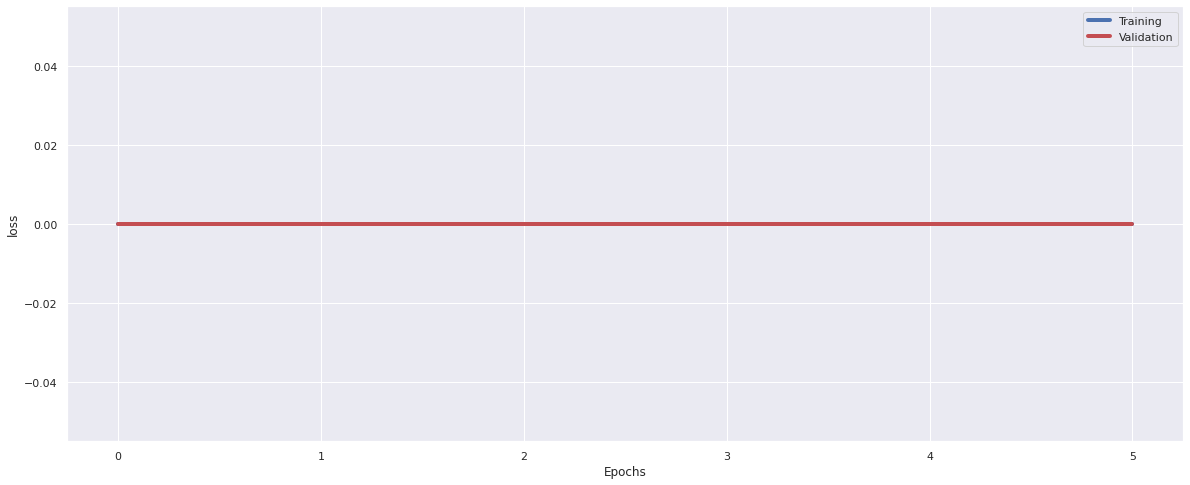

In [51]:
plot_history(history,plot_type='loss')

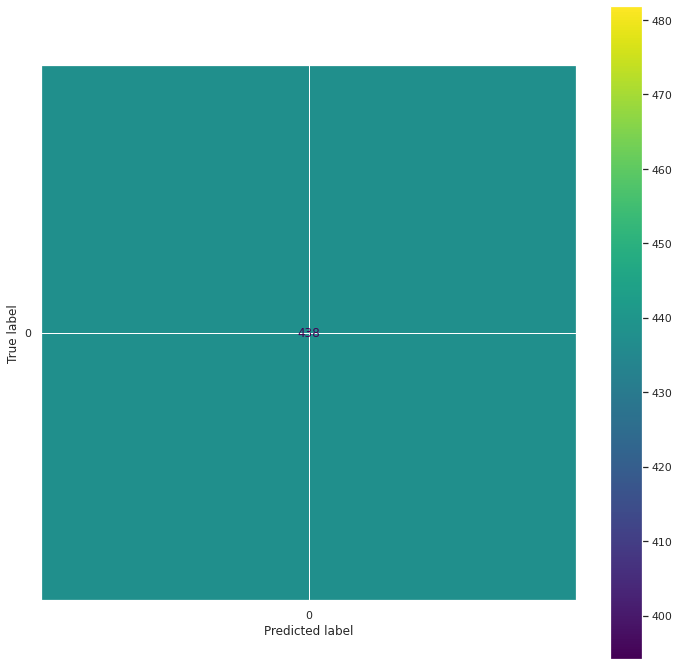

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(convert_predictions(y_test), convert_predictions(predictions),ax=ax)
plt.show()

### <font color="blue">K-Fold Cross Validation


In [53]:
from sklearn.model_selection import KFold#, StratifiedKFold

In [54]:
def kfold_validation(no_folds: int=3, plot_results: bool=True,
                     model_params: dict={},training_params: dict={}):
  validation_set_accuracy = []
  models = []

  if plot_results:
    verbose=2
  else:
    verbose=0

  itr = 0
  kf = KFold(n_splits=no_folds)
  for train_index, val_index in kf.split(X_train,y_train):
    train_set, y_train_set = X_train.iloc[train_index], y_train[train_index]
    val_set,y_val = X_train.iloc[val_index], y_train[val_index]
    
    # First, create a new model
    model = create_model(**model_params)
    #model.summary()

    # Finally, let's fit the model
    history = model.fit(train_set, y_train_set, 
                      validation_data=(val_set,y_val),
                      callbacks=[early_stopping],
                      verbose=verbose,
                      **training_params,
                      )
  
    
    # Finally, let's 
    pred_val = model.predict(val_set)
    f1 = f1_score(convert_predictions(y_val), convert_predictions(pred_val), average='weighted')
    
    validation_set_accuracy.append(f1)
    models.append(model)

    # Plot the results
    if plot_results:
      plot_history(history,plot_type='acc')

  
  # Convert to numpy array
  validation_set_accuracy = np.array(validation_set_accuracy)

  # Return the best model (as an example)
  best_model = models[np.argmax(validation_set_accuracy)]

  # Print the reults
  if plot_results:
    print('Average F1-Score over validation set is %.2f' %validation_set_accuracy.mean())
    print('STD of F1-Score over validation set is %.2f' %validation_set_accuracy.std())
  return best_model,validation_set_accuracy.mean(),validation_set_accuracy.std()

In [55]:
kfold_params = {
    'no_folds': 3,
    'plot_results': False,
    'model_params': {
      'no_hidden_neurons': [25,10], 
      'activation_func': 'sigmoid',
      'l1_reg': 0,
      'l2_reg': 0,
      'learning_rate': 0.001,
      'learning_rate_decay': 0.99,
      'dropout_rate':0,
      'weight_initializer': None,
      'optimizer_name': 'adam',
      'regularization_type': 'kernel',
  },
  'training_params': {
    'batch_size': 16,
    'epochs': 10
  }
}

In [56]:
model,validation_set_accuracy_mean,validation_set_accuracy_std = kfold_validation(**kfold_params)

11/11 [==============================] - 0s 2ms/step


In [57]:
kfold_params['plot_results'] = False

### <font color="blue">Effect of Learning Rate

In [58]:
def evaluate_efect_param(parameter_type: str='kfold', parameter_name: str='', values_list: list=[]):
  scores_val = []
  scores_test = []
  models = []
  for val in values_list:
      
      if parameter_type == 'kfold':
        kfold_params[parameter_name] = val
      elif parameter_type == 'model_params':
        kfold_params['model_params'][parameter_name] = val
      elif parameter_type == 'training_params':
        kfold_params['training_params'][parameter_name] = val
        
      model,validation_set_accuracy_mean,validation_set_accuracy_std = kfold_validation(**kfold_params)
      
      scores_val.append(validation_set_accuracy_mean)

      predictions = model.predict(X_test)
      score_test = f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted')
      scores_test.append(score_test)

      models.append(model)
      print('Val: %s, Validation Score: %.3f, Test Score: %.3f' %(str(val),validation_set_accuracy_mean,score_test))

      
  # Plot the results
  plt.figure(figsize=(20,8))
  str_values_list = []
  for v in values_list:
    str_values_list.append(str(v))

  plt.plot(str_values_list,scores_test,lw=5)
  plt.plot(str_values_list,scores_val,lw=5,color='orange')
  plt.xlabel(parameter_name)
  plt.ylabel('F1-Score')
  plt.legend(['F1: Test Set','F1: Validation Set'])
  plt.show()

  # Get the best model
  best_model = models[np.argmax(scores_val)]
  best_val = values_list[np.argmax(scores_val)]

  return best_model,best_val


14/14 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.05, Validation Score: 1.000, Test Score: 1.000


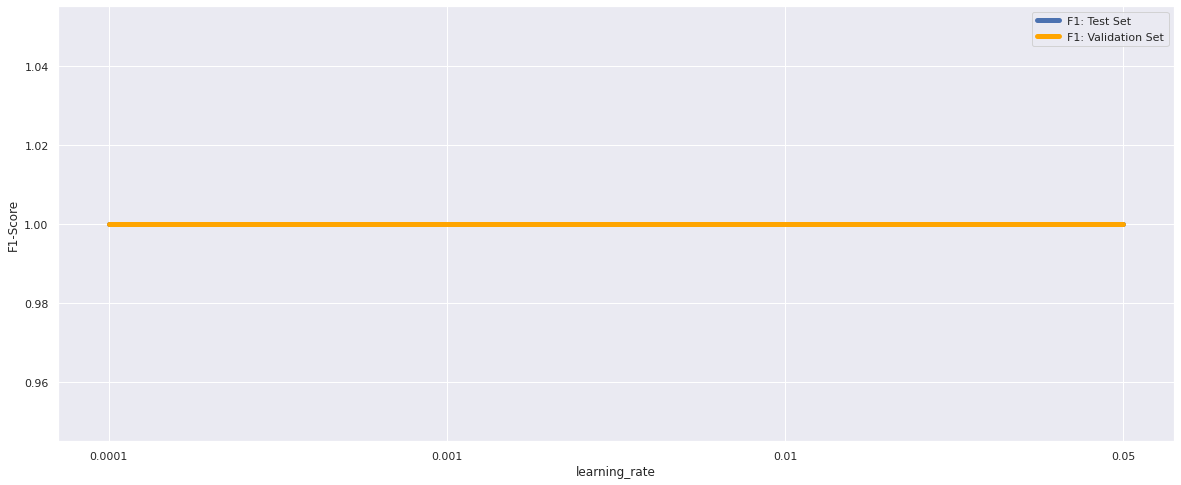

In [59]:
model,best_lr = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate', values_list=[0.0001,0.001,.01,0.05])

#### Effect of Learning Rate Decay

14/14 [==============================] - 0s 2ms/step
Val: 0.75, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: 0.85, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.95, Validation Score: 1.000, Test Score: 1.000


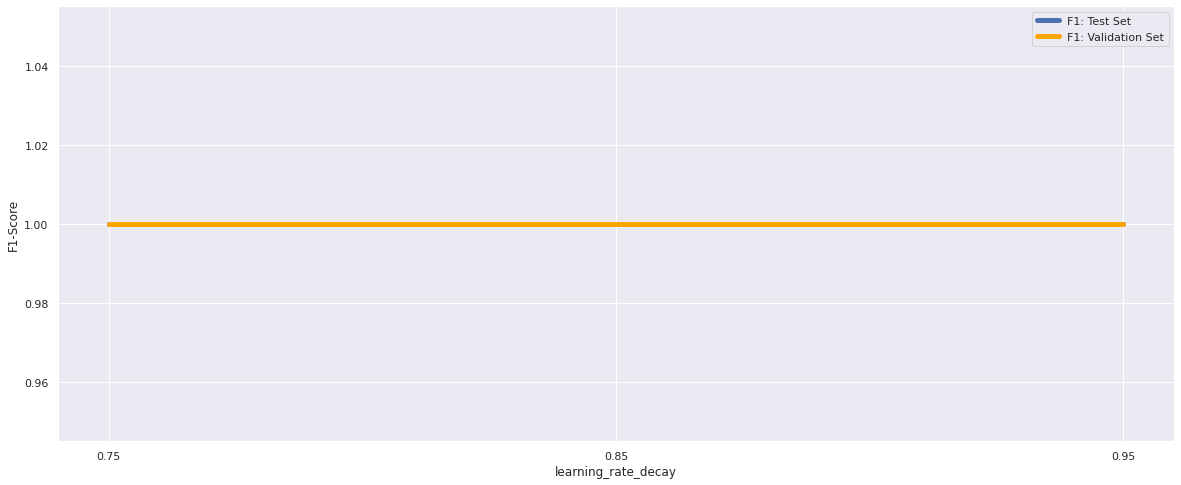

In [60]:
kfold_params['model_params']['learning_rate'] = best_lr
model,best_lr_decay = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate_decay', values_list=[0.75,0.85,0.95])

### <font color="blue">Effect of Batch Size

14/14 [==============================] - 0s 2ms/step
Val: 4, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 16, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 32, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 64, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 256, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 1024, Validation Score: 1.000, Test Score: 1.000


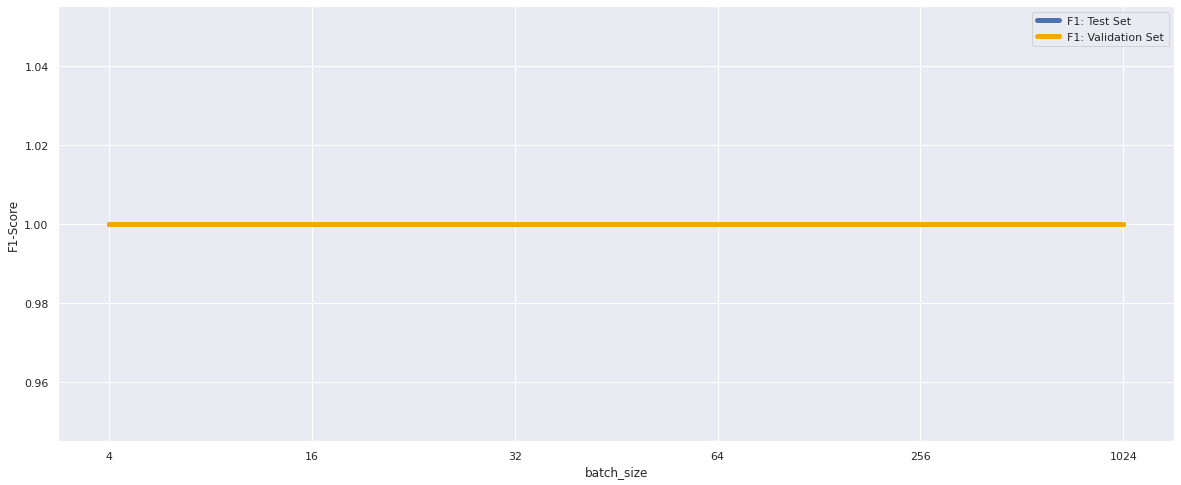

In [61]:
kfold_params['model_params']['learning_rate_decay'] = best_lr_decay
model,best_batch_size = evaluate_efect_param(parameter_type='training_params',parameter_name='batch_size', values_list=[4,16,32,64,256,1024])

### <font color="blue">Weight Initialization Techniques

14/14 [==============================] - 0s 2ms/step
Val: RandomNormal, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: RandomUniform, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: GlorotUniform, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: GlorotNormal, Validation Score: 1.000, Test Score: 1.000


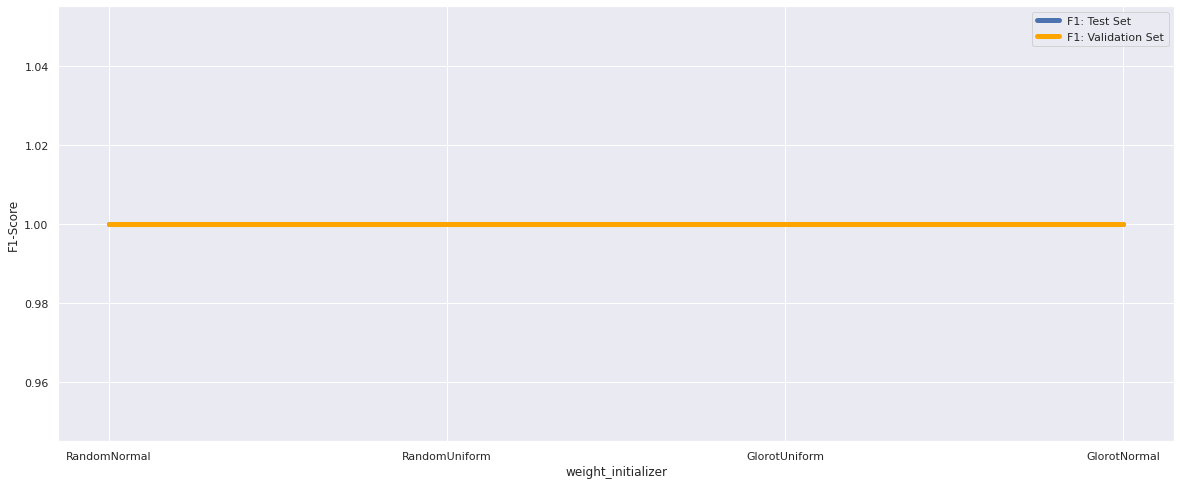

In [62]:
weight_initializers=['RandomNormal','RandomUniform','GlorotUniform','GlorotNormal']
kfold_params['training_params']['batch_size'] = best_batch_size
model,best_weight_initializer = evaluate_efect_param(parameter_type='model_params',parameter_name='weight_initializer', values_list=weight_initializers)

In [63]:
kfold_params['model_params']['weight_initializer'] = best_weight_initializer

### <font color="blue">Importance of Activation Functions


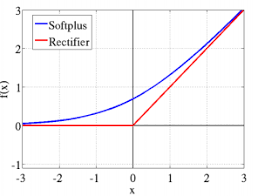

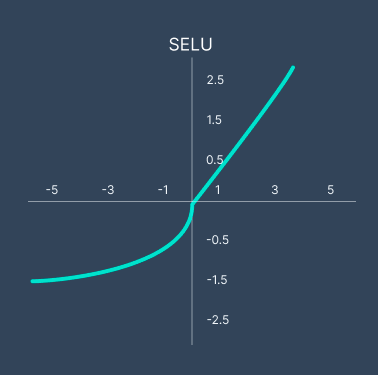

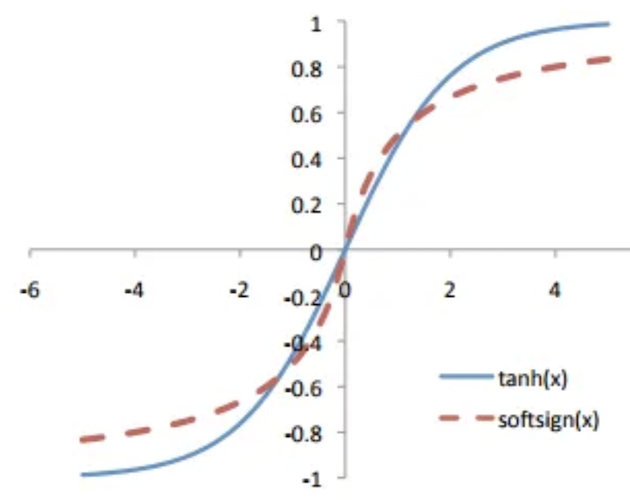

14/14 [==============================] - 0s 2ms/step
Val: relu, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: tanh, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: sigmoid, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: softplus, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: softsign, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: selu, Validation Score: 1.000, Test Score: 1.000


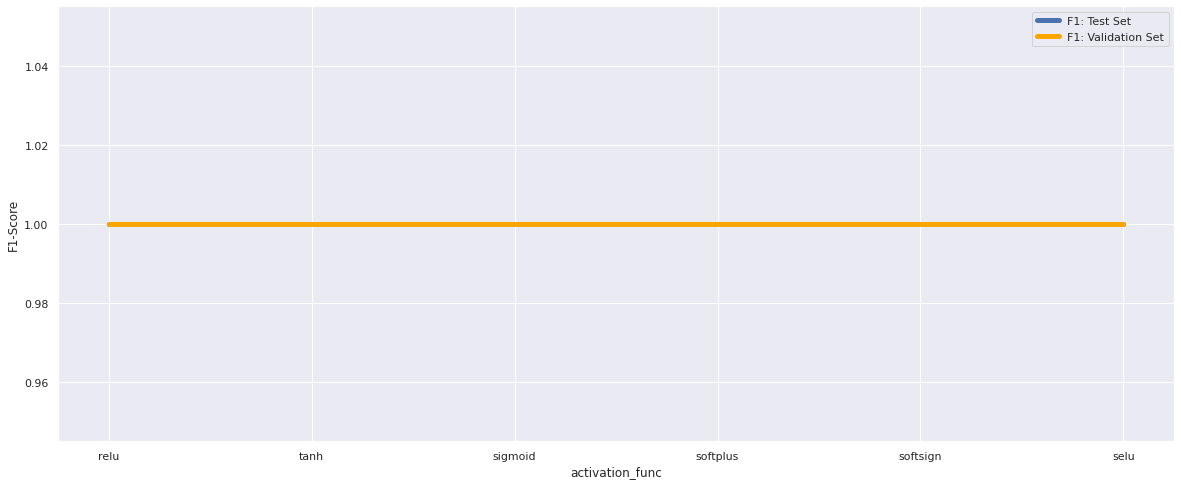

In [64]:
model,best_activation_func = evaluate_efect_param(parameter_type='model_params',parameter_name='activation_func', values_list=['relu','tanh','sigmoid','softplus','softsign','selu'])
kfold_params['model_params']['activation_func'] = best_activation_func

### <font color="blue">Effect of L1 and L2 Regularization


14/14 [==============================] - 0s 2ms/step
Val: 1e-05, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000


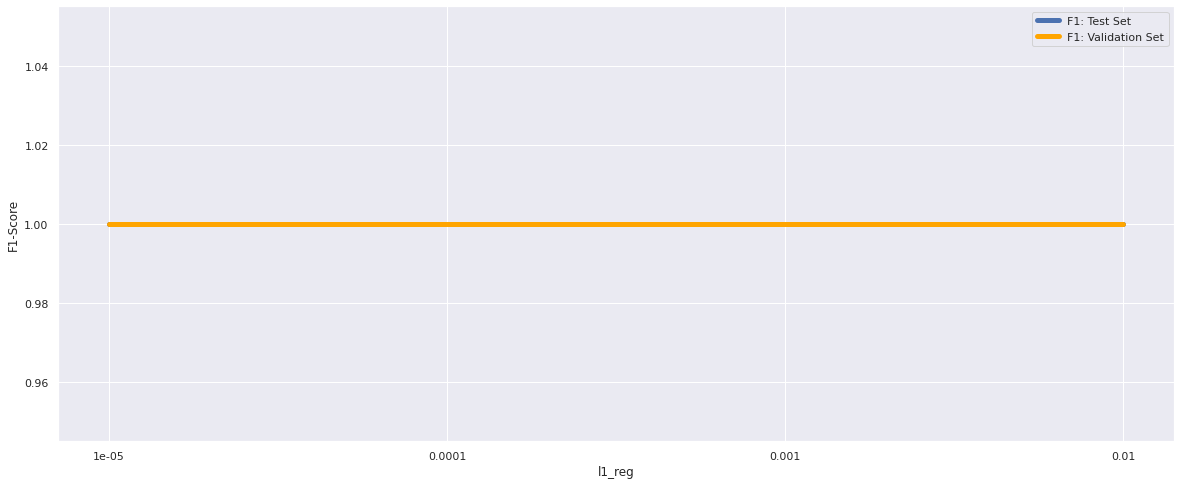

In [65]:
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l1_reg'] = best_l1_reg

14/14 [==============================] - 0s 2ms/step
Val: 1e-05, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000


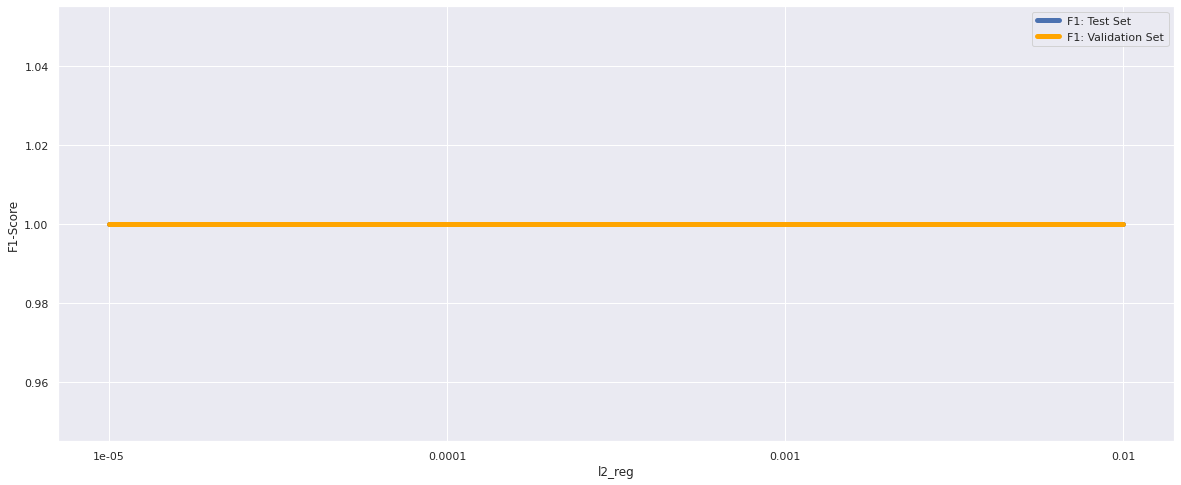

In [66]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l2_reg'] = best_l2_reg

14/14 [==============================] - 0s 1ms/step
Val: 1e-05, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: 0.001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000


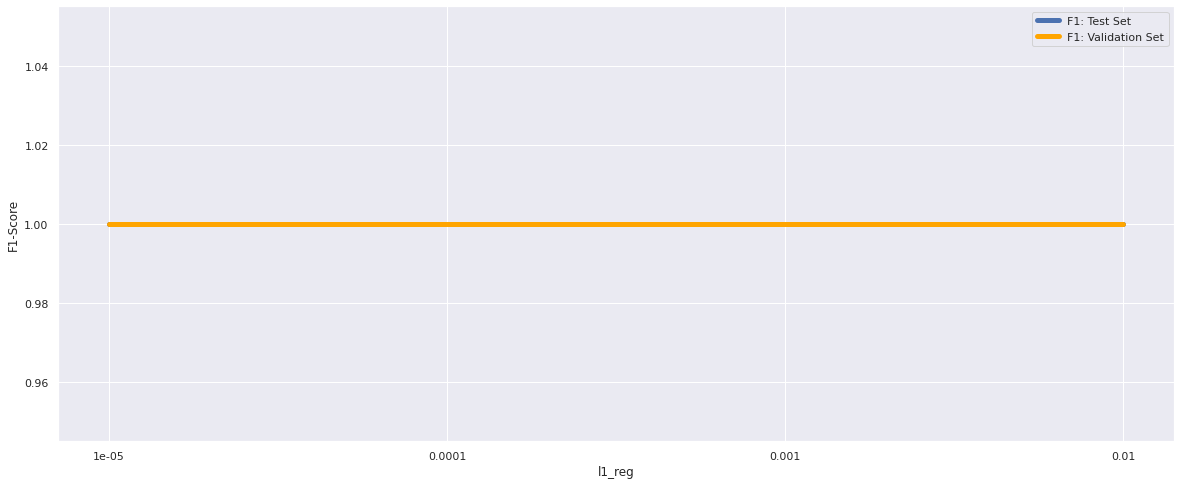

In [67]:
kfold_params['model_params']['regularization_type'] = 'activation'
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l1_reg'] = best_l1_reg

14/14 [==============================] - 0s 1ms/step
Val: 1e-05, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000


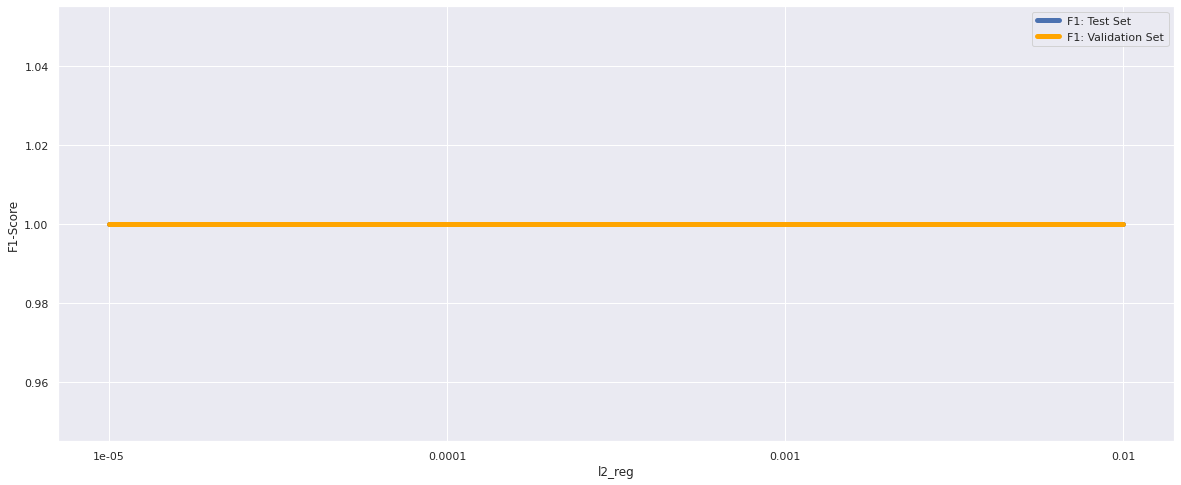

In [68]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l2_reg'] = best_l2_reg

### <font color="blue">Effect of Dropout


14/14 [==============================] - 0s 1ms/step
Val: 0.0001, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.01, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.1, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 0.3, Validation Score: 1.000, Test Score: 1.000


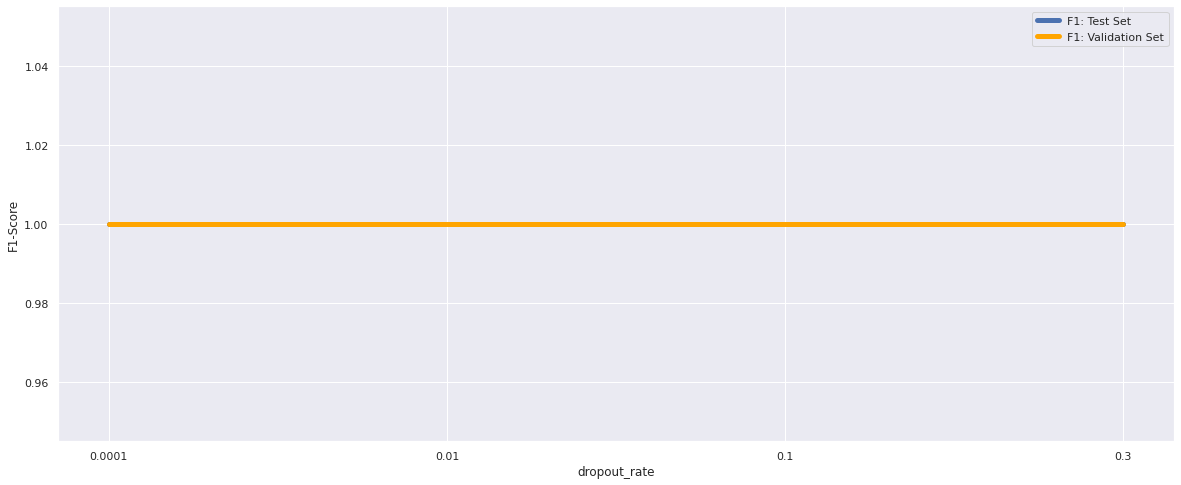

In [69]:
model,best_dropout_rate = evaluate_efect_param(parameter_type='model_params',parameter_name='dropout_rate', values_list=[0.0001,0.01,0.1,0.3])
kfold_params['model_params']['dropout_rate'] = best_dropout_rate

### <font color="blue">Effect of Number of Layers and Network Size


14/14 [==============================] - 0s 2ms/step
Val: [10], Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: [30, 10], Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: [20, 10, 6], Validation Score: 1.000, Test Score: 1.000


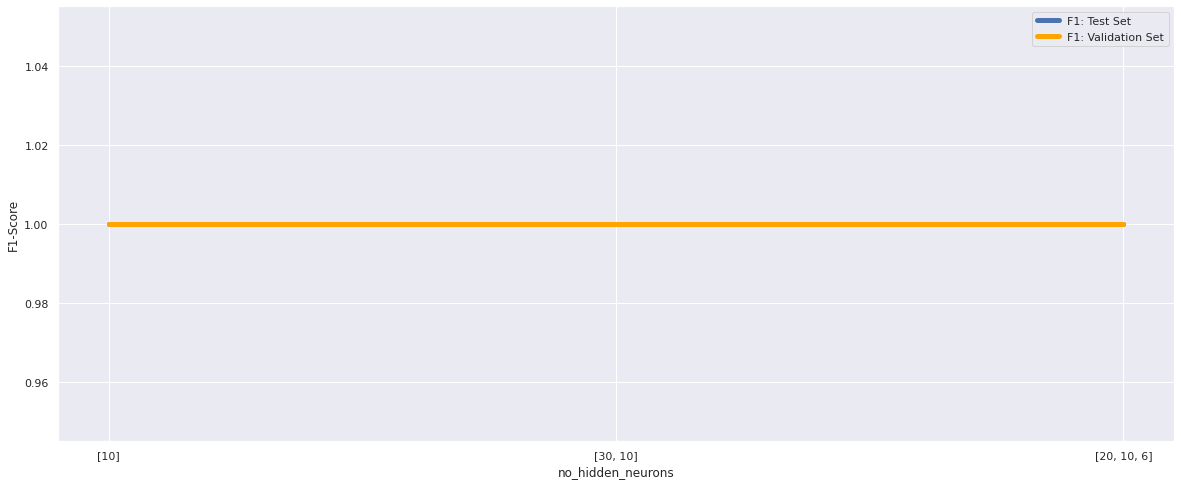

In [70]:
model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='no_hidden_neurons',values_list=[[10],[30,10],[20,10,6]])
kfold_params['model_params']['no_hidden_neurons'] = best_architecture

### <font color="blue">Effect of Number of Epochs


14/14 [==============================] - 0s 2ms/step
Val: 10, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: 30, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 1ms/step
Val: 50, Validation Score: 1.000, Test Score: 1.000


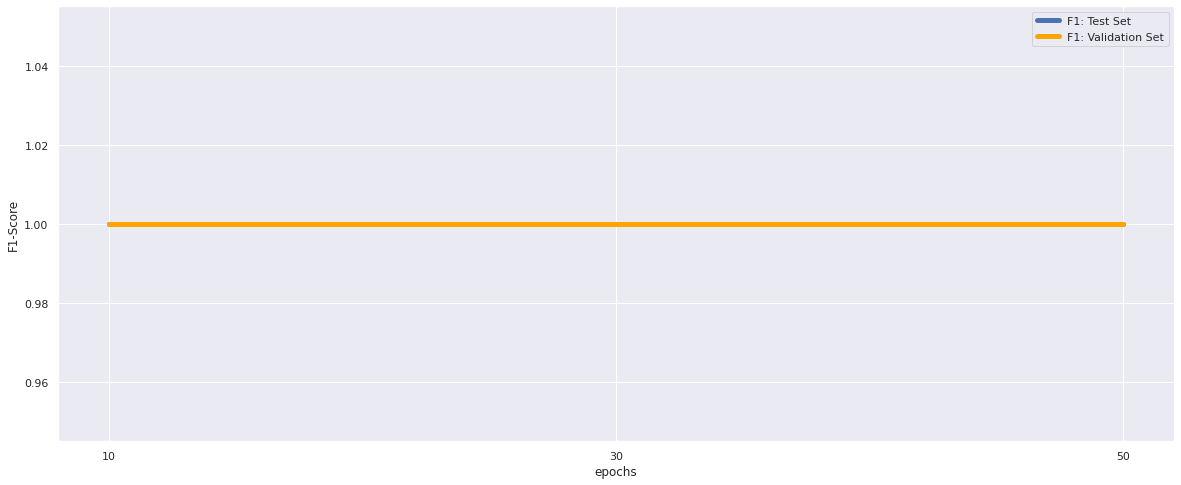

In [71]:
model,best_no_epochs = evaluate_efect_param(parameter_type='training_params',parameter_name='epochs', values_list=[10,30,50])
kfold_params['training_params']['epochs'] = best_no_epochs

In [72]:
kfold_params['training_params']['epochs'] = 3

### <font color="blue">Effect of Optimizer

14/14 [==============================] - 0s 2ms/step
Val: sgd, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: adam, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: RMSprop, Validation Score: 1.000, Test Score: 1.000
14/14 [==============================] - 0s 2ms/step
Val: Adadelta, Validation Score: 1.000, Test Score: 1.000


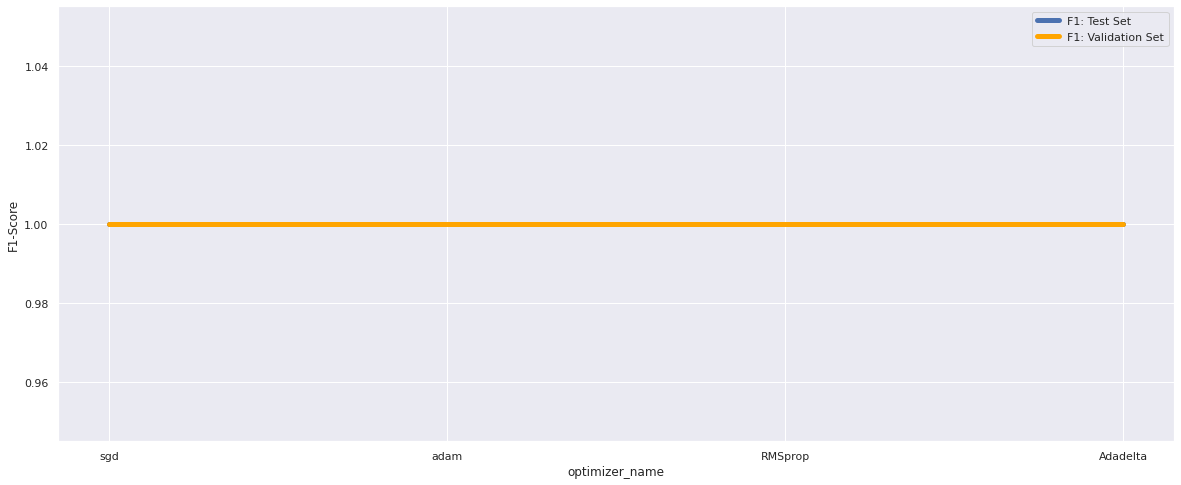

In [73]:
model,best_optimizer = evaluate_efect_param(parameter_type='model_params',parameter_name='optimizer_name', values_list=['sgd','adam','RMSprop','Adadelta'])
kfold_params['model_params']['optimizer_name'] = best_optimizer

### Last Performance Check

14/14 [==============================] - 0s 2ms/step
Weighted F1-score is 1.00


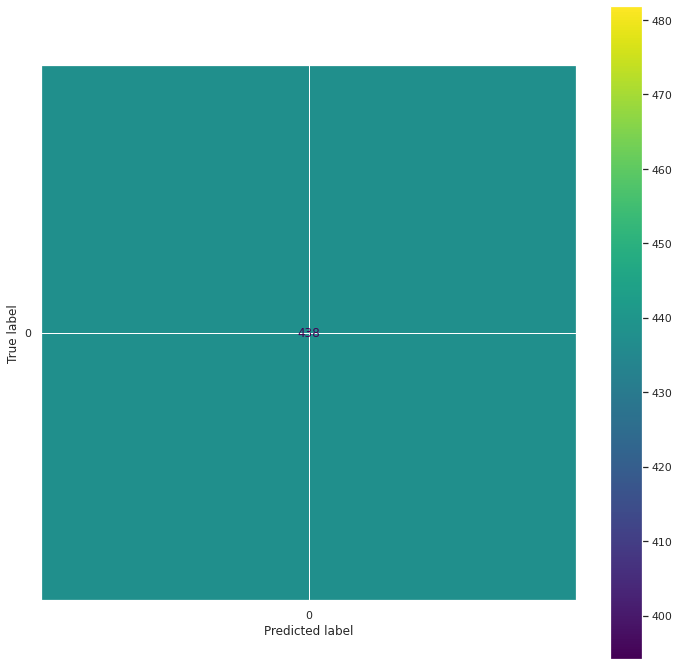

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
predictions = model.predict(X_test)
print('Weighted F1-score is %.2f' %f1_score(convert_predictions(y_test), convert_predictions(predictions), average='weighted'))
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(convert_predictions(y_test), convert_predictions(predictions),ax=ax)
plt.show()